# Prédiction du churn client (Télécom) — Analyse & Modélisation par Réseau de Neurones

## DEVOIR
L’objectif ici est de **prédire la probabilité de churn** à partir des caractéristiques clients, puis de préparer les éléments nécessaires au déploiement.

## Objectifs du travail
1) réaliser une analyse univariée du target (churn).
2) réaliser une analyse bivariée.
3) afficher le pourcentage de remplissage de chaque feature
4) réaliser un modèle de deep learning base sur le ANN( artificial neural
network)
5) enfin déployer le modèle sur share streamlit

> **Dataset :** `Churn_Modelling.csv`  
> **Cible :** `Exited` (0 = client conservé, 1 = client perdu)


In [1]:
# Imports de base
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 140)

# Chemin du fichier (si besoin, modifie uniquement cette ligne)
csv_path = r"Churn_Modelling (1).csv"

df = pd.read_csv(csv_path)
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 1) Comprendre les données (structure et contenu)

On commence par :
- la taille du dataset (nombre de lignes / colonnes)
- les types de variables
- des statistiques descriptives

Cette étape permet de vérifier rapidement si les données sont cohérentes avant toute modélisation.


In [2]:
print("Shape (lignes, colonnes) :", df.shape)
display(df.info())
display(df.describe(include='all').T)


Shape (lignes, colonnes) : (10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


## 2) Qualité des données — taux de remplissage

On calcule le **% de valeurs non manquantes** par variable, et le nombre de valeurs manquantes.  
Même si ce dataset est souvent complet, cette vérification est un réflexe “propre” avant d’aller plus loin.


In [3]:
fill_rate = (df.notna().mean() * 100).round(2).sort_values(ascending=False)
missing = df.isna().sum().sort_values(ascending=False)

display(fill_rate.to_frame("Fill_rate_%"))
display(missing.to_frame("Missing_count").head(20))


,Fill_rate_%
RowNumber,100.0
CustomerId,100.0
Surname,100.0
CreditScore,100.0
Geography,100.0
Gender,100.0
Age,100.0
Tenure,100.0
Balance,100.0
NumOfProducts,100.0


,Missing_count
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


### Lecture rapide
- **Si Fill_rate_% = 100%**, on peut en général avancer sans imputation.
- S’il y a des valeurs manquantes, on décidera **au cas par cas** : suppression, imputation simple (médiane/mode), ou imputation plus avancée.


## 3) Analyse univariée de la cible (Exited)

Objectif : mesurer la proportion de churn et vérifier l’éventuel **déséquilibre de classes**.  
En churn, une classe minoritaire est fréquente : cela influence le choix des métriques (ex : recall, ROC-AUC).


,count,rate_%
Exited,,
0,7963,79.63
1,2037,20.37


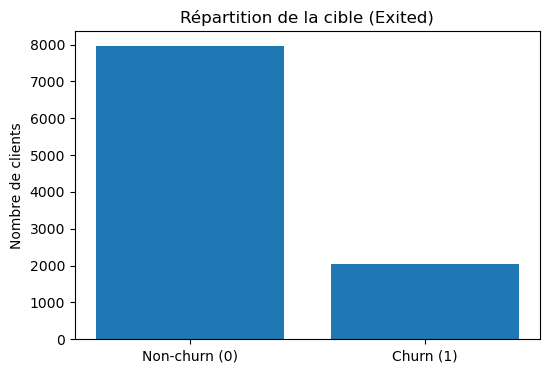

Taux de churn observé : 20.37%


In [4]:
target_col = "Exited"

counts = df[target_col].value_counts().sort_index()
rates = (counts / counts.sum() * 100).round(2)

display(pd.DataFrame({"count": counts, "rate_%": rates}))

plt.figure(figsize=(6,4))
plt.bar(["Non-churn (0)", "Churn (1)"], counts.values)
plt.title("Répartition de la cible (Exited)")
plt.ylabel("Nombre de clients")
plt.show()

churn_rate = float(rates.loc[1])
print(f"Taux de churn observé : {churn_rate:.2f}%")


### Interprétation
- Ici, le churn représente environ **~20%** des clients (à confirmer sur ton exécution).
- Avec une classe churn minoritaire, il faut éviter de juger uniquement sur l’**accuracy** :
  - **Recall (classe 1)** : combien de churners sont réellement détectés
  - **Precision (classe 1)** : parmi les clients signalés “à risque”, combien churnent vraiment
  - **ROC-AUC** : capacité globale à séparer les deux classes


## 4) Nettoyage minimal (colonnes non informatives)

Certaines colonnes ne sont pas pertinentes pour apprendre un comportement de churn :
- `RowNumber`, `CustomerId` : identifiants techniques
- `Surname` : texte non structuré (peut contenir de l’info, mais pas exploité ici)

On les retire pour éviter d’introduire du bruit.


In [5]:
drop_cols = [c for c in ["RowNumber", "CustomerId", "Surname"] if c in df.columns]
df_model = df.drop(columns=drop_cols).copy()

print("Colonnes supprimées :", drop_cols)
print("Colonnes utilisées :", df_model.columns.tolist())
df_model.head()


Colonnes supprimées : ['RowNumber', 'CustomerId', 'Surname']
Colonnes utilisées : ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 5) Analyse bivariée

On cherche ici des **signaux** :
- Quels segments présentent un churn plus élevé ?
- Quelles variables numériques ont des distributions différentes entre churn / non-churn ?

Ces résultats sont utiles à la fois pour la compréhension métier et pour guider la modélisation.


### 5.1 Variables catégorielles/discrètes vs churn
On calcule le **taux de churn** par modalité et on visualise avec des bar charts.


In [6]:
def churn_rate_by(col, target="Exited", data=None):
    if data is None:
        data = df_model
    tmp = data.groupby(col)[target].agg(['count','mean']).rename(columns={'mean':'churn_rate'})
    tmp['churn_rate_%'] = (tmp['churn_rate'] * 100).round(2)
    return tmp.sort_values('churn_rate', ascending=False)

# Colonnes catégorielles (object)
cat_cols = [c for c in df_model.columns if c != target_col and df_model[c].dtype == "object"]

# Colonnes discrètes qu'on lit souvent comme "segments"
for c in ["HasCrCard", "IsActiveMember", "NumOfProducts"]:
    if c in df_model.columns and c not in cat_cols:
        cat_cols.append(c)

cat_cols


['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']


=== Geography vs churn ===


,count,churn_rate,churn_rate_%
Geography,,,
Germany,2509,0.324432,32.44
Spain,2477,0.166734,16.67
France,5014,0.161548,16.15


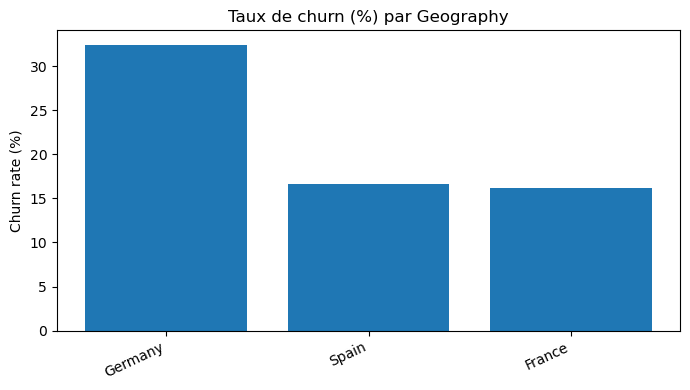


=== Gender vs churn ===


,count,churn_rate,churn_rate_%
Gender,,,
Female,4543,0.250715,25.07
Male,5457,0.164559,16.46


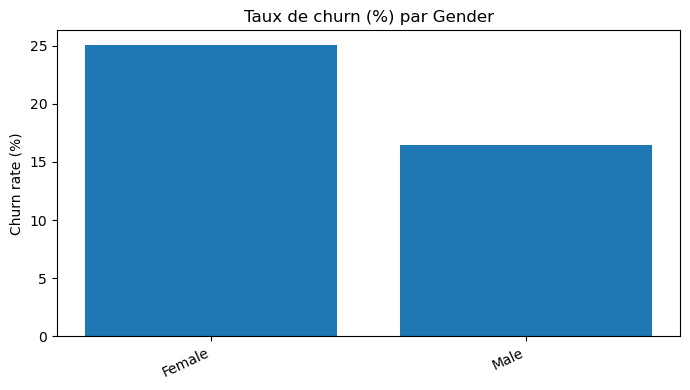


=== HasCrCard vs churn ===


,count,churn_rate,churn_rate_%
HasCrCard,,,
0,2945,0.208149,20.81
1,7055,0.201843,20.18


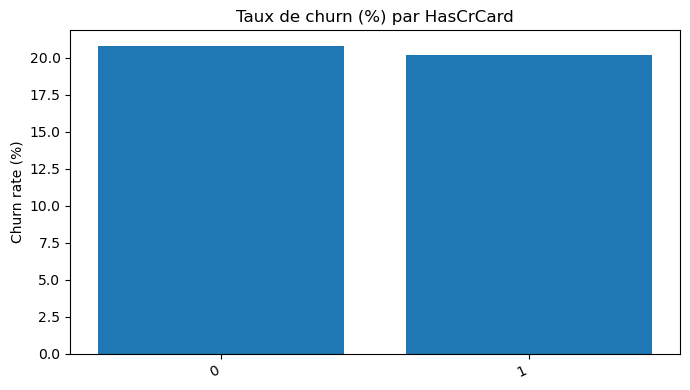


=== IsActiveMember vs churn ===


,count,churn_rate,churn_rate_%
IsActiveMember,,,
0,4849,0.268509,26.85
1,5151,0.142691,14.27


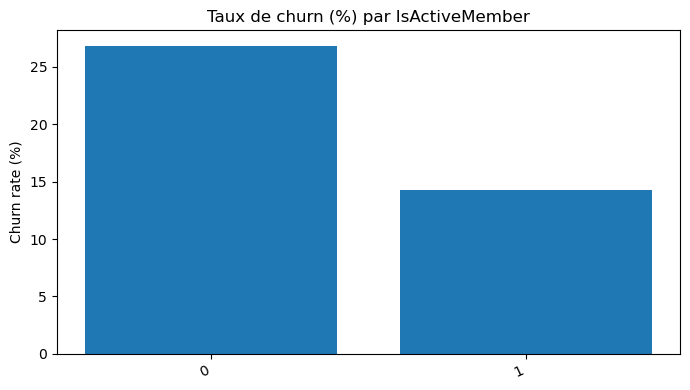


=== NumOfProducts vs churn ===


,count,churn_rate,churn_rate_%
NumOfProducts,,,
4,60,1.000000,100.00
3,266,0.827068,82.71
1,5084,0.277144,27.71
2,4590,0.075817,7.58


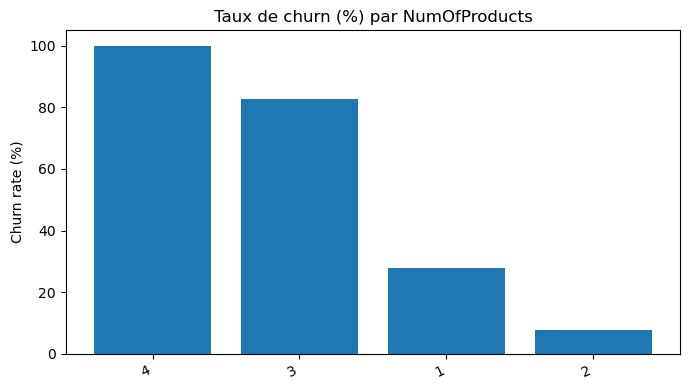

In [7]:
for col in cat_cols:
    print(f"\n=== {col} vs churn ===")
    display(churn_rate_by(col))
    
    tmp = churn_rate_by(col).reset_index()
    plt.figure(figsize=(7,4))
    plt.bar(tmp[col].astype(str), tmp["churn_rate_%"])
    plt.title(f"Taux de churn (%) par {col}")
    plt.ylabel("Churn rate (%)")
    plt.xticks(rotation=25, ha='right')
    plt.tight_layout()
    plt.show()


### Commentaires attendus (exemples)
À titre d’exemple, sur des résultats courants de ce dataset :
- `Geography` : certains pays peuvent présenter un churn plus élevé → **segment à risque**.
- `IsActiveMember` : les non-actifs churnent davantage → l’engagement est un indicateur clé.
- `NumOfProducts` : certains niveaux peuvent être associés à un churn fort (attention à la taille des groupes).

👉 Bon réflexe : **croiser le taux de churn avec la taille du groupe** (count).


### 5.2 Variables numériques vs churn
On compare la distribution des variables numériques entre :
- Non-churn (0)
- Churn (1)

On combine :
- statistiques (moyenne / médiane / écart-type)
- boxplots pour visualiser les différences


In [8]:
num_cols = [c for c in df_model.columns if c != target_col and pd.api.types.is_numeric_dtype(df_model[c])]
num_cols


['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

Exited                             0              1
CreditScore     mean      651.853196     645.351497
                median    653.000000     646.000000
                std        95.653837     100.321503
Age             mean       37.408389      44.837997
                median     36.000000      45.000000
                std        10.125363       9.761562
Tenure          mean        5.033279       4.932744
                median      5.000000       5.000000
                std         2.880658       2.936106
Balance         mean    72745.296779   91108.539337
                median  92072.680000  109349.290000
                std     62848.040701   58360.794816
NumOfProducts   mean        1.544267       1.475209
                median      2.000000       1.000000
                std         0.509536       0.801521
HasCrCard       mean        0.707146       0.699067
                median      1.000000       1.000000
                std         0.455101       0.458776
IsActiveMember  mean        0.554565       0.360825
                median      1.000000       0.000000
                std         0.497045       0.480358
EstimatedSalary mean    99738.391772  101465.677531
                median  99645.040000  102460.840000
                std     57405.586966   57912.418071

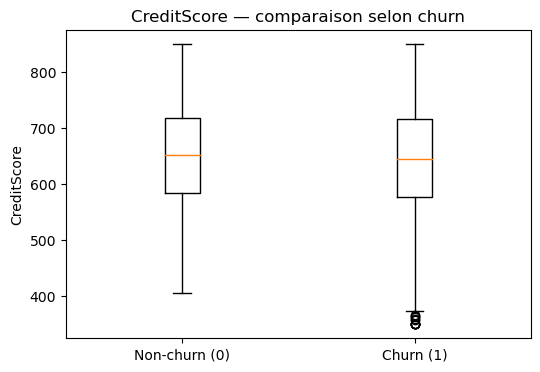

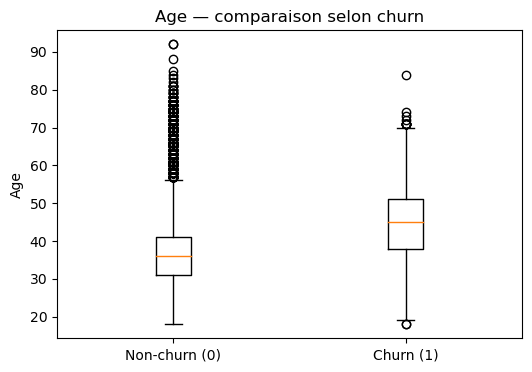

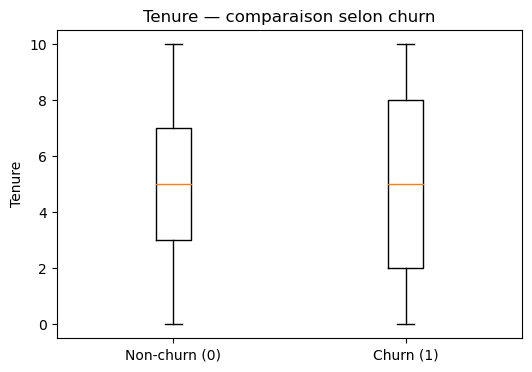

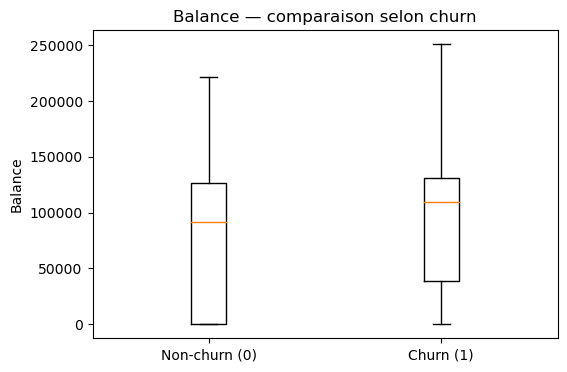

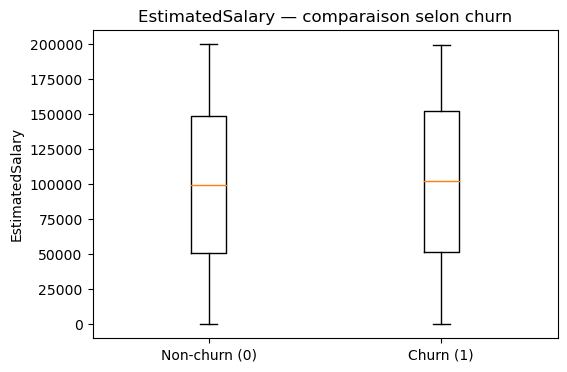

In [9]:
stats = df_model.groupby(target_col)[num_cols].agg(['mean','median','std']).T
display(stats)

focus = [c for c in ["CreditScore","Age","Tenure","Balance","EstimatedSalary"] if c in num_cols]
for col in focus:
    plt.figure(figsize=(6,4))
    data0 = df_model[df_model[target_col]==0][col].dropna()
    data1 = df_model[df_model[target_col]==1][col].dropna()
    plt.boxplot([data0, data1], labels=["Non-churn (0)", "Churn (1)"])
    plt.title(f"{col} — comparaison selon churn")
    plt.ylabel(col)
    plt.show()


### Interprétation (guide de rédaction)
Sous chaque graphique, ajoute 1–2 phrases du type :
- “On observe un décalage de médiane sur **Age**, ce qui suggère que l’âge est un facteur discriminant.”
- “Le **Balance** est plus élevé chez les churners : cela peut indiquer un profil client particulier (à investiguer).”


## 6) Corrélations (numériques)

La corrélation mesure une relation **linéaire** (elle ne capture pas tout), mais elle donne une intuition rapide.  
On regarde :
- la matrice de corrélation
- la corrélation de chaque variable avec `Exited`


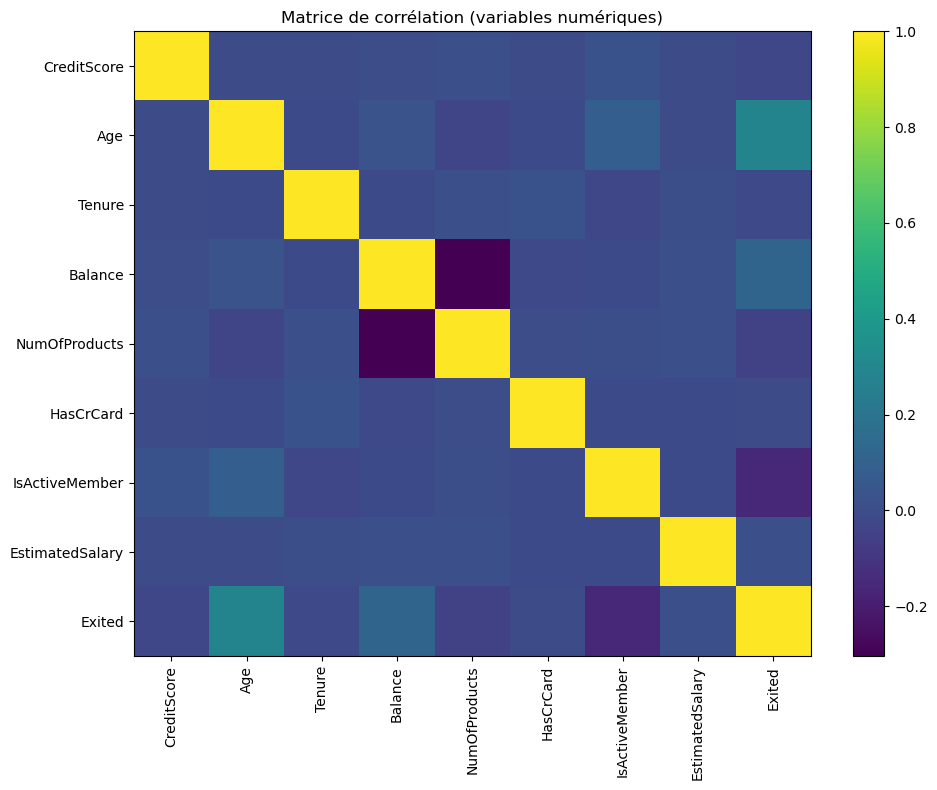

,corr_with_target
Exited,1.000000
Age,0.285323
Balance,0.118533
EstimatedSalary,0.012097
HasCrCard,-0.007138
Tenure,-0.014001
CreditScore,-0.027094
NumOfProducts,-0.047820
IsActiveMember,-0.156128


In [10]:
corr = df_model[num_cols + [target_col]].corr(numeric_only=True)

plt.figure(figsize=(10,8))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Matrice de corrélation (variables numériques)")
plt.tight_layout()
plt.show()

corr_target = corr[target_col].sort_values(ascending=False)
display(corr_target.to_frame("corr_with_target"))


## 7) Préparation des données (encodage + standardisation)

Un réseau de neurones a besoin de données **numériques** et souvent **standardisées**.

On applique :
- OneHotEncoding sur `Geography`, `Gender`
- StandardScaler sur les variables numériques
- Split train/test avec stratification (même proportion de churn des deux côtés)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X = df_model.drop(columns=[target_col])
y = df_model[target_col].astype(int)

cat_features = [c for c in X.columns if X[c].dtype == "object"]
num_features = [c for c in X.columns if c not in cat_features]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ],
    remainder="drop"
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Num features:", num_features)
print("Cat features:", cat_features)


Train: (8000, 10) Test: (2000, 10)
Num features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Cat features: ['Geography', 'Gender']


## 8) Modèle — Réseau de neurones (ANN)

Deux cas :
- si TensorFlow est disponible : entraînement Keras (avec EarlyStopping)
- sinon : entraînement via `MLPClassifier` (scikit-learn), qui reste un réseau de neurones (ANN)

L’idée est d’obtenir un modèle robuste et reproductible.


In [12]:
# Transformation en matrice numérique
X_train_t = preprocess.fit_transform(X_train)
X_test_t = preprocess.transform(X_test)

# Conversion en dense si nécessaire
try:
    X_train_dense = X_train_t.toarray()
    X_test_dense = X_test_t.toarray()
except Exception:
    X_train_dense = np.asarray(X_train_t)
    X_test_dense = np.asarray(X_test_t)

print("Dimensions après pré-traitement :", X_train_dense.shape, X_test_dense.shape)


Dimensions après pré-traitement : (8000, 13) (2000, 13)


In [13]:
# Détection de TensorFlow (optionnel)
use_tf = True
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    from tensorflow.keras.callbacks import EarlyStopping
except Exception:
    use_tf = False

print("TensorFlow disponible :", use_tf)


TensorFlow disponible : False


In [14]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

if use_tf:
    tf.random.set_seed(42)

    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_dense.shape[1],)),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name="auc")]
    )

    es = EarlyStopping(monitor='val_auc', mode='max', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train_dense, y_train.values,
        validation_split=0.2,
        epochs=100,
        batch_size=64,
        callbacks=[es],
        verbose=1
    )
else:
    from sklearn.neural_network import MLPClassifier

    model = MLPClassifier(
        hidden_layer_sizes=(32, 16),
        activation='relu',
        solver='adam',
        max_iter=600,
        random_state=42
    )
    model.fit(X_train_dense, y_train.values)


## 9) Courbes d’apprentissage (si TensorFlow)
Ces courbes servent à vérifier la stabilité de l’entraînement et l’overfitting.


In [15]:
if use_tf:
    plt.figure(figsize=(7,4))
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title("Loss — entraînement vs validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(7,4))
    plt.plot(history.history['auc'], label='train_auc')
    plt.plot(history.history['val_auc'], label='val_auc')
    plt.title("AUC — entraînement vs validation")
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()


## 10) Évaluation sur le jeu de test

On calcule :
- Accuracy
- Precision / Recall / F1
- Matrice de confusion
- ROC-AUC + ROC curve


Accuracy: 0.8605

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.48      0.58       407

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Confusion matrix:
 [[1527   66]
 [ 213  194]]
ROC-AUC: 0.8407


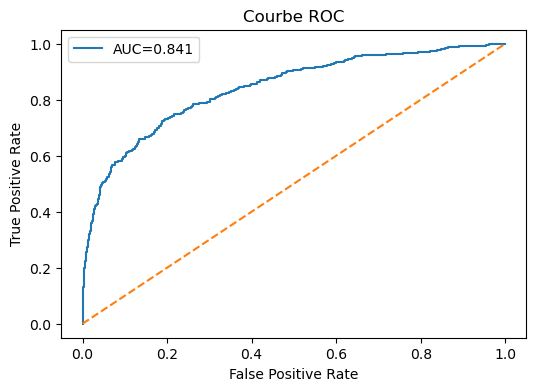

In [16]:
# Probabilités
if use_tf:
    y_proba = model.predict(X_test_dense).ravel()
else:
    y_proba = model.predict_proba(X_test_dense)[:, 1]

threshold = 0.5
y_pred = (y_proba >= threshold).astype(int)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", round(auc, 4))

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC={auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.title("Courbe ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


## 11) Ajustement du seuil (utile pour la rétention)

Le seuil 0.5 n’est pas forcément optimal.  
On compare rapidement plusieurs seuils pour voir l’impact sur :
- precision churn
- recall churn


In [17]:
from sklearn.metrics import precision_recall_fscore_support

thresholds = [0.3, 0.4, 0.5, 0.6]
rows = []

for th in thresholds:
    pred = (y_proba >= th).astype(int)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, pred, average='binary', zero_division=0)
    acc = accuracy_score(y_test, pred)
    rows.append([th, acc, prec, rec, f1])

res = pd.DataFrame(rows, columns=["threshold", "accuracy", "precision_churn", "recall_churn", "f1_churn"])
display(res)


,threshold,accuracy,precision_churn,recall_churn,f1_churn
0,0.3,0.8350,0.591017,0.614251,0.602410
1,0.4,0.8530,0.671733,0.542998,0.600543
2,0.5,0.8605,0.746154,0.476658,0.581709
3,0.6,0.8560,0.790244,0.398034,0.529412


## 12) Sauvegarde des artefacts (pour déploiement)

On sauvegarde :
- `preprocess.joblib`
- le modèle (`ann_model.h5` si TensorFlow, sinon `mlp_model.joblib`)

Ces fichiers serviront directement à prédire dans une application.


In [18]:
import joblib, os

out_dir = "churn_ann_artifacts_v2"
os.makedirs(out_dir, exist_ok=True)

prep_path = os.path.join(out_dir, "preprocess.joblib")
joblib.dump(preprocess, prep_path)

if use_tf:
    model_path = os.path.join(out_dir, "ann_model.h5")
    model.save(model_path)
else:
    model_path = os.path.join(out_dir, "mlp_model.joblib")
    joblib.dump(model, model_path)

prep_path, model_path


('churn_ann_artifacts_v2\\preprocess.joblib',
 'churn_ann_artifacts_v2\\mlp_model.joblib')

## 13) Conclusion (modèle + lecture métier)

- Le dataset est exploitable (données complètes).
- Le churn est minoritaire.
- Plusieurs variables ressortent fortement dans l’EDA (ex : âge, activité, géographie).
- Le réseau de neurones obtient de bonnes performances globales (ROC-AUC).

